## Getting Started
To prepare LibRealSense Python environment, follow the steps below:

- Download [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) tool to run Python code
- Download [Python 3.9](https://www.python.org/downloads/release/python-395/) or [Python 3.7](https://www.python.org/downloads/release/python-379/)
- Download [get-pip.py](https://bootstrap.pypa.io/get-pip.py) and run the following commands in PyCharm terminal: 
    - ***python get-pip.py*** 
    - ***pip install pyrealsense2***
    - ***pip install numpy***
    - ***pip install matplotlib***
    - ***pip install opencv-python***
<p align="left"><img src="images/pyrealsense2.png" width="40%" /><br><br></p>
    

In [19]:
import numpy as np                        # fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment Ready")

Environment Ready


## Find RealSense Devices

In [20]:
print("Connected Devices:")
devices = []
for d in rs.context().devices:
    if d.get_info(rs.camera_info.name).lower() != 'platform camera':
        devices.append(d)
        print(d.get_info(rs.camera_info.name))
        d.get_info(rs.camera_info.serial_number)
if not devices:
    print("No RealSense device was detected")

Connected Devices:
Intel RealSense D435I


## Find Depth and RGB Sensors

In [21]:
rgb_sensor = depth_sensor = None
for device in devices:
    print("Available sensors in device:", d.get_info(rs.camera_info.name))
    for s in device.sensors:
        if s.get_info(rs.camera_info.name) == 'RGB Camera':
            print(" - found RGB sensor")
            rgb_sensor = s
        if s.get_info(rs.camera_info.name) == 'Stereo Module':
            depth_sensor = s
            print(" - found Depth sensor")
    if not rgb_sensor:
        print("The demo requires Depth camera with Color sensor")
        exit(0)

Available sensors in device: Intel RealSense D435I
 - found Depth sensor
 - found RGB sensor


## Configure Streams

In [117]:
all_rgb_profiles = rgb_sensor.get_stream_profiles()
all_depth_profiles = depth_sensor.get_stream_profiles()

# configure selected profiles
width = 848
height = 480
fps = 30
rgb_profiles, depth_profiles = [], []

for stream in all_rgb_profiles:
    f = stream.as_video_stream_profile()
    if not (f.width() == width and f.height() == height and f.format() == rs.format.bgr8 and f.fps() == fps):
        continue
    rgb_profiles.append(stream)

for stream in all_depth_profiles:
    f = stream.as_video_stream_profile()
    if not (f.width() == width and f.height() == height and f.format() == rs.format.z16 and f.fps() == fps):
        continue
    depth_profiles.append(stream)

sync = rs.syncer()
print("Done!")

Done!


## Capturing Color Frames with Sensors

In [118]:
rgb_sensor.open(rgb_profiles)
rgb_sensor.start(sync)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
    sync.wait_for_frames()
frameset = sync.wait_for_frames()
color_frame = frameset.get_color_frame()

# stop
rgb_sensor.stop()
rgb_sensor.close()

print("Done!")

Done!


## Capture Depth Frames using Sensor

In [119]:
depth_sensor.open(depth_profiles)
depth_sensor.start(sync)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(5):
    sync.wait_for_frames()
frameset = sync.wait_for_frames()
depth_frame = frameset.get_depth_frame()

# stop
depth_sensor.stop()
depth_sensor.close()

print("Done!")

Done!


## Displaying Depth and Color Frames

<pyrealsense2.frame BGR8 #6>


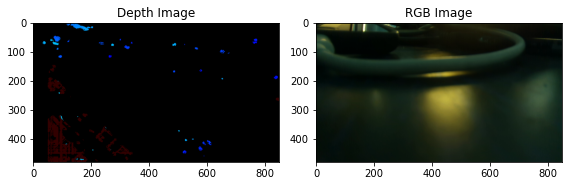

Done!


In [120]:
print(color_frame)
colorizer = rs.colorizer()
colorized_depth = np.asanyarray(colorizer.colorize(depth_frame).get_data())
colorized_color = np.asanyarray(colorizer.colorize(color_frame).get_data())

arr = [colorized_depth, colorized_color]
title = ["Depth Image", "RGB Image"]
plt.rcParams["axes.grid"] = False
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(arr[i], cmap=plt.cm.jet)
    plt.title(title[i])

plt.tight_layout()
plt.show()

print("Done!")

## Capturing Depth and Color Frame using Pipe

In [145]:
# Start pipe streaming
#cfg.enable_device_from_file("stairs.bag")
cfg = rs.config()
cfg.enable_stream(rs.stream.depth, 848, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 848, 480, rs.format.bgr8, 30)
profile = pipe.start(cfg)

# Skip 5 first frames to give the Auto-Exposure time to adjust
for x in range(10):
    pipe.wait_for_frames()
    
# Store next frameset for later processing:
frameset = pipe.wait_for_frames()
depth_frame = frameset.get_depth_frame()
color_frame = frameset.get_color_frame()

# Cleanup:
pipe.stop()
print("Frames are captured")

Frames are captured


## Changing RGB Exposure and Depth Laser Power Controls

In [141]:
if rgb_sensor.supports(rs.option.exposure) :
    print(rgb_sensor.get_option(rs.option.exposure))
    rgb_sensor.set_option(rs.option.exposure, 1000)
    print(rgb_sensor.get_option(rs.option.exposure))
    
if depth_sensor.supports(rs.option.laser_power) :
    print(depth_sensor.get_option(rs.option.laser_power))
    depth_sensor.set_option(rs.option.laser_power, 5)
    print(depth_sensor.get_option(rs.option.laser_power))

print("Done!")

9.0
1250.0
5.0
5.0
Done!
